# **1. Keşifsel Veri Analizi (EDA)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB
None
                open           high            low          close  \
count  619029.000000  619032.000000  619032.000000  619040.000000   
mean       83.023334      83.778311      82.256096      83.043763   
std        97.378769      98.207519      96.507421      97.389748   
min         1.620000       1.690000       1.500000       1.590000   
25%        40.220000      40.620000      39.830000      40.245000   
50%        62.590000      63.150000      62.020000      62.620000 

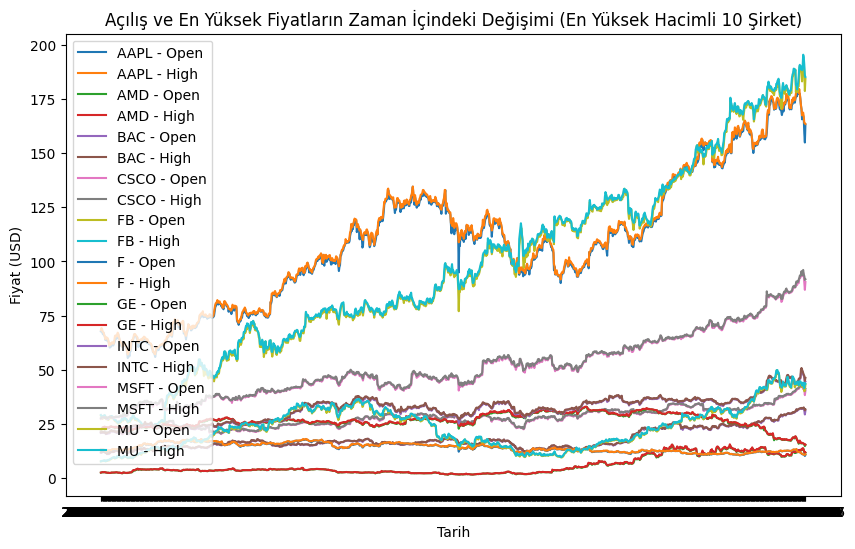

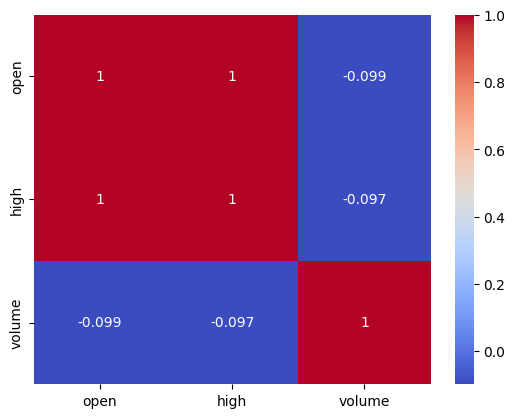

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/kaggle/input/sandp500/all_stocks_5yr.csv')


print(data.info())
print(data.describe())


top_10_companies = data.groupby('Name')['volume'].sum().nlargest(10).index
top_10_data = data[data['Name'].isin(top_10_companies)]


print(top_10_data.isnull().sum())


plt.figure(figsize=(10,6))
for name in top_10_data['Name'].unique():
    stock_data = top_10_data[top_10_data['Name'] == name]
    plt.plot(stock_data['date'], stock_data['open'], label=f'{name} - Open')
    plt.plot(stock_data['date'], stock_data['high'], label=f'{name} - High')

plt.title('Açılış ve En Yüksek Fiyatların Zaman İçindeki Değişimi (En Yüksek Hacimli 10 Şirket)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.show()

sns.heatmap(top_10_data[['open', 'high', 'volume']].corr(), annot=True, cmap='coolwarm')
plt.show()


# 2. Veri Ön İşleme (En Yüksek Hacimli Şirketlere Göre)

In [12]:
from sklearn.preprocessing import StandardScaler


top_10_cleaned = top_10_data[['open', 'high', 'volume']].dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(top_10_cleaned)


# 3. Kümeleme (K-Means)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


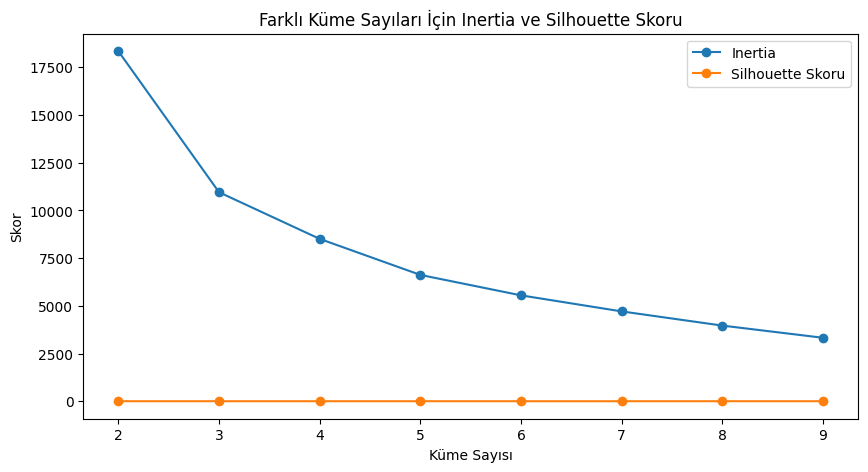

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
cluster_range = range(2, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))


plt.figure(figsize=(10,5))
plt.plot(cluster_range, inertia, marker='o', label='Inertia')
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Skoru')
plt.title('Farklı Küme Sayıları İçin Inertia ve Silhouette Skoru')
plt.xlabel('Küme Sayısı')
plt.ylabel('Skor')
plt.legend()
plt.show()


# 4. Model Değerlendirme


In [9]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)


top_10_cleaned['Cluster'] = kmeans.labels_

print(top_10_cleaned.head(10))



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         open     high     volume  Cluster
1259  67.7142  68.4014  158168416        2
1260  68.0714  69.2771  129029425        2
1261  68.5014  68.9114  151829363        2
1262  66.7442  67.6628  118721995        2
1263  66.3599  67.3771   88809154        2
1264  66.9785  67.1656   97924631        2
1265  65.8714  66.1042  108854046        2
1266  65.3842  65.3842  118891367        2
1267  63.7142  64.1671  111596821        2
1268  64.1785  64.5142   82583823        2


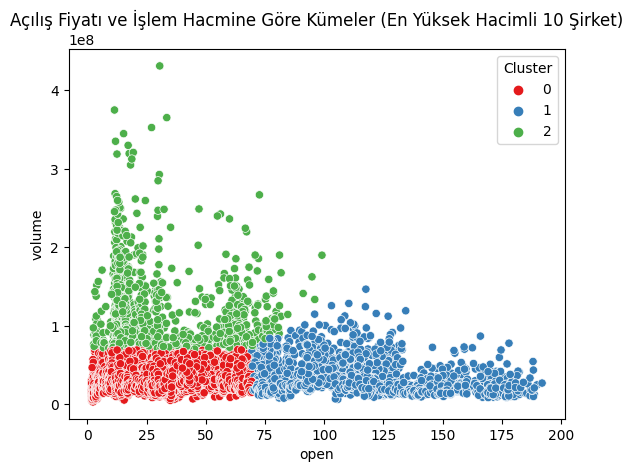

In [10]:

sns.scatterplot(x='open', y='volume', hue='Cluster', data=top_10_cleaned, palette='Set1')
plt.title('Açılış Fiyatı ve İşlem Hacmine Göre Kümeler (En Yüksek Hacimli 10 Şirket)')
plt.show()
